In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import json
import numpy as np


In [3]:
# create a dict of color, key 1 to 50 and value is a matplotlib color
def create_color_dict():
    color_dict = {}
    for i in range(1, 51):
        color_dict[i] = plt.cm.tab20(i)
    return color_dict
color_dict = create_color_dict()


In [4]:
df_points = pd.read_csv("data\Results_points.csv", sep=",", header=0, index_col=0)
df_points = df_points.drop(columns=['Area', 'Mean', 'Min', 'Max', 'Count'])
df_points = df_points.astype(float)
df_points['Slice'] = df_points['Slice'].astype(int)
df_points['Counter'] = df_points['Counter'].astype(int)
df_points = df_points.rename(columns={'Counter': 'Group'})
# add a color column matching the group
df_points['Color'] = df_points['Group'].map(color_dict)
df_points.head()

,X,Y,Slice,Group,Color
,,,,,
1,629.0,208.0,1,0,NaN
2,634.5,255.5,1,0,NaN
3,664.5,300.5,1,0,NaN
4,664.5,261.5,1,0,NaN
5,703.5,252.5,1,0,NaN


In [5]:
df_bb = pd.read_csv("data\Results_bb.csv", sep=",", header=0, index_col=0)
df_bb = df_bb.drop(columns=['GroupName'])
df_bb = df_bb.astype(float)
df_bb['Slice'] = df_bb['Slice'].astype(int)
df_bb['Group'] = df_bb['Group'].astype(int)
df_bb = df_bb.reset_index(drop=True)
df_bb.head()

,BX,BY,Width,Height,Slice,Group
0,1056.0,494.0,592.0,580.0,1,1
1,1322.0,484.0,588.0,590.0,2,1
2,274.0,146.0,590.0,588.0,1,0
3,574.0,134.0,588.0,578.0,2,0
4,880.0,118.0,588.0,574.0,3,0


In [6]:
image = imageio.imread('data\9-1.tif')

def show_image(image, df_points, df_bb, slice=1):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image[slice - 1], cmap='gray')
    temp_points = df_points[df_points['Slice'] == slice]
    ax.scatter(temp_points['X'], temp_points['Y'], s=10, marker='x')

    temp_bb = df_bb[df_bb['Slice'] == slice]
    for index, row in temp_bb.iterrows():
        x = row['BX']
        y = row['BY']
        w = row['Width']
        h = row['Height']
        rect = plt.Rectangle((x, y), w, h, fill=False)
        ax.add_patch(rect)
    return fig, ax

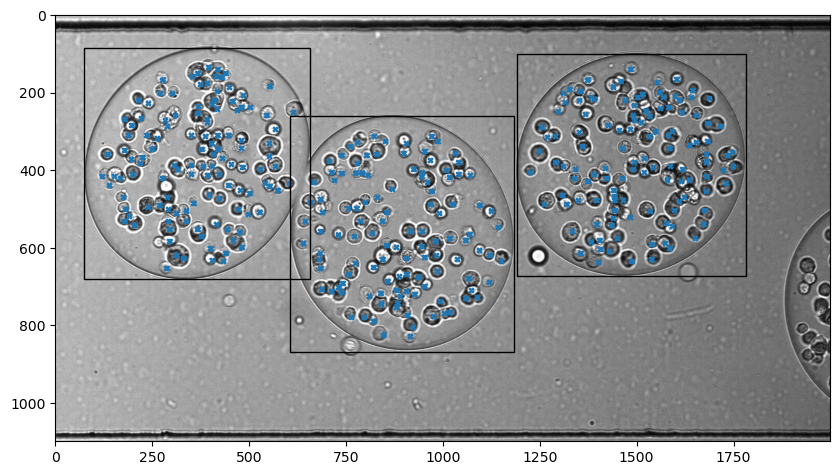

In [7]:
fig, ax = show_image(image, df_points, df_bb, slice=4)
plt.show()

In [8]:
results = dict()
for i in range(1,51):
    results["9_1_frame_{}".format(i)] = {"boxes": [], "cells": []}
    temp_points = df_points[df_points['Slice'] == i]
    for index, row in temp_points.iterrows():
        results["9_1_frame_{}".format(i)]["cells"].append([int(row['X']), int(row['Y']), int(row['Group'])])
    temp_bb = df_bb[df_bb['Slice'] == i]
    for index, row in temp_bb.iterrows():
        results["9_1_frame_{}".format(i)]["boxes"].append([int(row['BX']), int(row['BY']), int(row['Width']), int(row['Height']), int(row['Group'])])
with open('data/9_1.json', 'w') as fp:
    json.dump(results, fp, indent=2)
